# 1.Chargement des Données et Analyse Exploratoire

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from scipy.optimize import linear_sum_assignment
from google.colab import drive

## 1.1 Chargement des Données

In [ ]:
import pandas as pd
from google.colab import drive

# Fonction pour charger les données
def load_data(file_path):
    if 'google.colab' in str(get_ipython()):
        drive.mount('/gdrive')
        file_path = '/gdrive' + file_path

    try:
        # Load the CSV file
        data_frame = pd.read_csv(file_path)

        # Display the name of the DataFrame
        print("Loaded DataFrame:", file_path.split('/')[-1].split('.')[0])

        return data_frame
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")

file_path = "/MyDrive/Colab Notebooks/Projet_4/data_simulation.csv"

data = load_data(file_path)

# Affichage des premières lignes du DataFrame
data.head()

# Création de la colonne 'time_segment' basée sur les quantiles
data['time_segment'] = pd.qcut(data['recency'], q=[0, 0.25, 0.5, 0.75, 1], labels=False, duplicates='drop')

data.head()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
Loaded DataFrame: data_simulation


,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,recency,frequency,monetary_value,...,other,sport,technology,toys_baby,total_items,order_total_delay,freight_ratio,kmeans_label,ClusterID,time_segment
0,0.0,0.017497,0.0,0.307692,1.00,0.023923,0.363636,0.155680,0.0,0.005664,...,0.0,0.0,0.0,0.0,0.0,0.155680,0.083333,1,1,0
1,0.0,0.002327,0.0,0.038462,0.75,0.009569,0.363636,0.159888,0.0,0.001085,...,0.0,0.0,0.0,0.0,0.0,0.159888,0.312500,6,4,1
2,0.0,0.010134,0.0,0.307692,0.50,0.119617,0.181818,0.751753,0.0,0.003442,...,1.0,0.0,0.0,0.0,0.0,0.753156,0.208333,2,0,3
3,0.0,0.004500,0.0,0.153846,0.75,0.090909,0.818182,0.448808,0.0,0.001741,...,0.0,0.0,1.0,0.0,0.0,0.450210,0.416667,4,2,2
4,0.0,0.024768,0.0,0.230769,1.00,0.057416,0.909091,0.402525,0.0,0.007859,...,0.0,0.0,1.0,0.0,0.0,0.403927,0.093750,4,2,2


In [ ]:
data.tail()

,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,recency,frequency,monetary_value,...,other,sport,technology,toys_baby,total_items,order_total_delay,freight_ratio,kmeans_label,ClusterID,time_segment
93353,0.0,0.272126,0.0,0.384615,1.00,0.129187,0.454545,0.625526,0.015873,0.165051,...,0.0,0.0,0.0,0.0,0.013514,0.626928,0.250000,6,4,3
93354,0.0,0.009917,0.0,0.038462,0.75,0.138756,1.000000,0.366059,0.000000,0.003376,...,0.0,0.0,0.0,1.0,0.000000,0.367461,0.239583,3,7,2
93355,0.0,0.013603,0.0,0.038462,1.00,0.066986,0.090909,0.795231,0.000000,0.004489,...,1.0,0.0,0.0,0.0,0.000000,0.796634,0.208333,2,0,3
93356,0.0,0.016411,0.0,0.192308,1.00,0.052632,0.363636,0.165498,0.000000,0.005337,...,0.0,0.0,0.0,0.0,0.000000,0.166900,0.145833,5,5,1
93357,0.0,0.008195,0.0,0.153846,1.00,0.033493,0.363636,0.677419,0.000000,0.002856,...,0.0,0.0,0.0,0.0,0.000000,0.678822,0.208333,6,4,3


In [ ]:
data.columns

Index(['nb_orders', 'total_spend', 'mean_payment_sequential',
       'mean_payment_installments', 'mean_review_score', 'mean_delivery_days',
       'favorite_sale_month', 'recency', 'frequency', 'monetary_value',
       'books_cds_media', 'fashion_clothing_accessories', 'flowers_gifts',
       'groceries_food_drink', 'health_beauty', 'home_furniture', 'other',
       'sport', 'technology', 'toys_baby', 'total_items', 'order_total_delay',
       'freight_ratio', 'kmeans_label', 'ClusterID', 'time_segment'],
      dtype='object')

## 1.2 Analyse Exploratoire



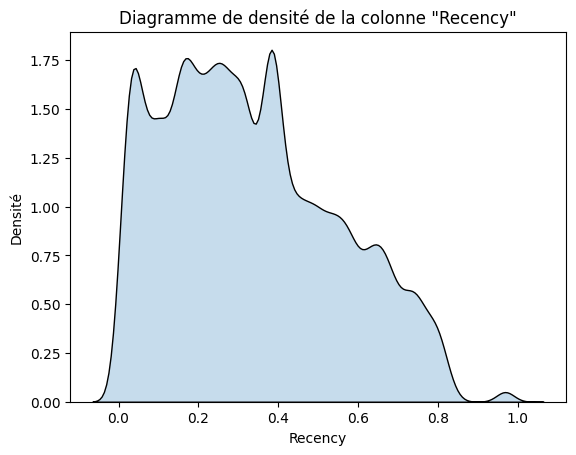

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nombre de seaux (bins)
num_bins = 10

sns.kdeplot(data['recency'], fill=True, edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Densité')
plt.title('Diagramme de densité de la colonne "Recency"')
plt.show()

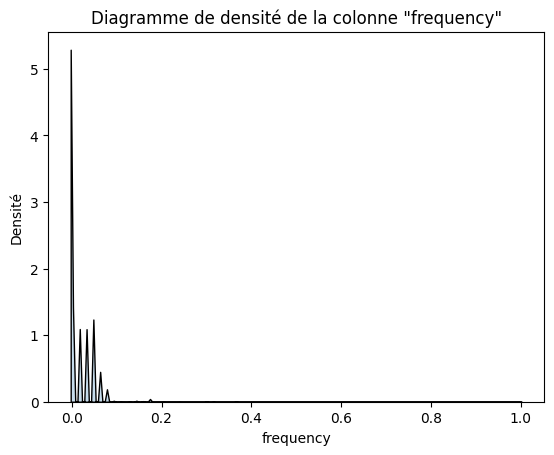

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nombre de seaux (bins)
num_bins = 10

sns.kdeplot(data['frequency'], fill=True, edgecolor='black')
plt.xlabel('frequency')
plt.ylabel('Densité')
plt.title('Diagramme de densité de la colonne "frequency"')
plt.show()

# 2.Clustering K-means Initial

## 2.1 Sélection des Caractéristiques et Standardisation

In [ ]:
# Clustering K-means Initial
features = ["recency", "frequency", "monetary_value", "mean_review_score"]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

## 2.2 Détermination des Clusters avec K-means Initial

In [ ]:
# Détermination des Clusters avec K-means Initial
k = 8
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_init=10, random_state=42)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nb_orders                     93358 non-null  float64
 1   total_spend                   93358 non-null  float64
 2   mean_payment_sequential       93358 non-null  float64
 3   mean_payment_installments     93358 non-null  float64
 4   mean_review_score             93358 non-null  float64
 5   mean_delivery_days            93358 non-null  float64
 6   favorite_sale_month           93358 non-null  float64
 7   recency                       93358 non-null  float64
 8   frequency                     93358 non-null  float64
 9   monetary_value                93358 non-null  float64
 10  books_cds_media               93358 non-null  float64
 11  fashion_clothing_accessories  93358 non-null  float64
 12  flowers_gifts                 93358 non-null  float64
 13  g

In [ ]:
# Fonction pour aligner les clusters prédits avec les clusters originaux
def align_clusters(a, b):
    confusion_matrix = pd.crosstab(a, b).values
    row_ind, col_ind = linear_sum_assignment(-confusion_matrix)
    mapping = dict(zip(col_ind, row_ind))
    return pd.Series(b).replace(mapping).values

# Ajout d'une colonne 'new_cluster' basée sur l'alignement des clusters
data['new_cluster'] = align_clusters(data['ClusterID'], kmeans.labels_)

# 3.Division des Données en Deux Périodes, entrainement et prédiction des modèles (T0 et T1)

## 3.1.Division des données en deux périodes (T0 et T1)

In [ ]:
T0_data = data[data['time_segment'] == 0].copy()
T1_data = data[data['time_segment'] > 0].copy()

## 3.2.Entraînement des modèles à deux temps différents (T0 et T1)

In [ ]:
# Entraînement des modèles à deux temps différents (T0 et T1)
kmeans_T0 = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans_T0.fit(scaler.transform(T0_data[features]))

kmeans_T1 = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans_T1.fit(scaler.transform(T1_data[features]))

KMeans(n_init=10, random_state=42)

## 3.3.Prédiction des deux modèles sur la data à l'état T1

In [ ]:
# Prédiction des deux modèles sur la data à l'état T1
T1_data = T1_data.sample(n=len(T0_data), random_state=42)

T0_data['predicted_cluster_T1'] = align_clusters(T1_data['ClusterID'], kmeans_T0.predict(scaler.transform(T1_data[features])))
T1_data['predicted_cluster_T1'] = align_clusters(T1_data['ClusterID'], kmeans_T1.predict(scaler.transform(T1_data[features])))

## 3.4.Calcul de l'ARI entre les deux clusterings

In [ ]:
data['new_cluster']

0        0
1        0
2        1
3        1
4        1
        ..
93353    5
93354    1
93355    1
93356    0
93357    1
Name: new_cluster, Length: 93358, dtype: int32

In [ ]:
# Calcul de l'ARI entre les deux clusterings
ari_T0_T1 = adjusted_rand_score(T1_data['new_cluster'], T1_data['predicted_cluster_T1'])
print(f"ARI entre les deux clusterings : {ari_T0_T1}")

ARI entre les deux clusterings : 0.5912938667878341


In [ ]:
data['frequency']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
93353    0.015873
93354    0.000000
93355    0.000000
93356    0.000000
93357    0.000000
Name: frequency, Length: 93358, dtype: float64

#4.Simulation pour déterminer la fréquence de mise à jour


##4.1.Fonction de simulation


In [ ]:
import numpy as np
def simulate_update_frequency(data, features, k, num_simulations=100):
    ari_scores = []

    for ts in data['time_segment'].unique():
        # Division des données en deux périodes (T0 et T1)
        T0_data = data[data['time_segment'] <= ts ]
        T1_data = data[data['time_segment'] > ts ]
        if (T0_data.shape[0] == 0 ) or (T1_data.shape[0] == 0) :
          continue

        # Entraînement des modèles à deux temps différents (T0 et T1)
        kmeans_T0 = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans_T0.fit(scaler.transform(T0_data[features]))

        kmeans_T1 = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans_T1.fit(scaler.transform(T1_data[features]))

        # Prédiction des deux modèles sur la data à l'état T1
        #T1_data = T1_data.sample(n=len(T0_data), random_state=42)

        co_predict = kmeans_T0.predict(scaler.transform(T1_data[features]))
        c1_predict = kmeans_T1.predict(scaler.transform(T1_data[features]))

        # Calcul de l'ARI entre les deux clusterings
        ari_T0_T1 = adjusted_rand_score(co_predict,c1_predict)
        ari_scores.append(ari_T0_T1)

    return np.array(ari_scores).mean()


In [ ]:
data.columns

Index(['nb_orders', 'total_spend', 'mean_payment_sequential',
       'mean_payment_installments', 'mean_review_score', 'mean_delivery_days',
       'favorite_sale_month', 'recency', 'frequency', 'monetary_value',
       'books_cds_media', 'fashion_clothing_accessories', 'flowers_gifts',
       'groceries_food_drink', 'health_beauty', 'home_furniture', 'other',
       'sport', 'technology', 'toys_baby', 'total_items', 'order_total_delay',
       'freight_ratio', 'kmeans_label', 'ClusterID', 'time_segment',
       'new_cluster'],
      dtype='object')

##4.2.Simulation avec différentes fréquences de mise à jour


In [ ]:
# Simulation avec différentes fréquences de mise à jour
update_frequencies = [0.05, 0.1, 0.15, 0.2]
ari_results = {}

for frequency in update_frequencies:
    # Simulation de la mise à jour du modèle de segmentation
    data['time_segment'] = pd.qcut(data['recency'], q=[0, frequency/12, 1], labels=False, duplicates='drop')
    ari_score = simulate_update_frequency(data, features, k)
    print(f"ARI Score pour une fréquence de mise à jour de {frequency} mois : {ari_score}")
    ari_results[frequency] = ari_score


ARI Score pour une fréquence de mise à jour de 0.05 mois : 0.2619400409991009
ARI Score pour une fréquence de mise à jour de 0.1 mois : 0.4503515110576466
ARI Score pour une fréquence de mise à jour de 0.15 mois : 0.22353415145946134
ARI Score pour une fréquence de mise à jour de 0.2 mois : 0.2979605390967739


##4.3.Analyse des résultats de la simulation


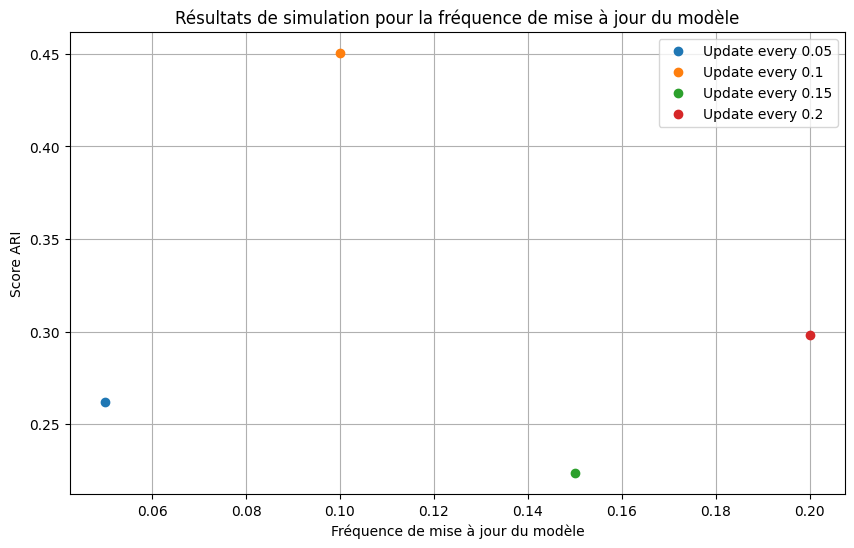

In [ ]:
# Visualisation des résultats avec les valeurs initiales des fréquences
plt.figure(figsize=(10, 6))

for frequency, ari_score in ari_results.items():
    plt.plot([frequency], [ari_score], 'o', label=f'Update every {frequency}')

plt.xlabel('Fréquence de mise à jour du modèle')
plt.ylabel('Score ARI')
plt.title('Résultats de simulation pour la fréquence de mise à jour du modèle')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Affichage des valeurs utilisées pour tracer le graphique
print("Fréquences de mise à jour du modèle (mois) :", update_frequencies)
print("Scores ARI correspondants :", list(ari_results.values()))

Fréquences de mise à jour du modèle (mois) : [0.05, 0.1, 0.15, 0.2]
Scores ARI correspondants : [0.2619400409991009, 0.4503515110576466, 0.22353415145946134, 0.2979605390967739]


**Convertir la fréquence de mise à jour de 0.05 mois en une unité de temps plus conventionnelle**

1 / 0.05 = 20 mois

1 /0.1 = 10 mois

Donc, une fréquence de mise à jour de 0.05 mois équivaut à une mise à jour du modèle de segmentation environ tous les 20 mois.




**Analyse générale :**

La fréquence de mise à jour de 0.1 mois obtient le score ARI le plus élevé (0.45), ce qui indique que cette fréquence conduit à une meilleure segmentation du modèle par rapport aux autres fréquences testées.


Une fréquence de mise à jour de 0.1 mois correspond à une mise à jour du modèle de segmentation environ tous les 10 mois. Cela signifie qu'environ tous les 10 mois, le modèle est actualisé ou recalibré en fonction des nouvelles données disponibles.

**Décision potentielle :**

La fréquence de mise à jour de 10 mois est la plus efficace en termes de qualité de segmentation, basée sur le score ARI le plus élevé.
